In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import statsmodels.api as sm 
import numpy as np 

In [3]:
url = 'https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv'

In [4]:
da= pd.read_csv(url)

In [6]:
vars = ['SMQ020', 'RIAGENDR', 'RIDAGEYR','RIDRETH1','DMDEDUC2', 'BMXBMI', 'SMQ020']

In [9]:
da = da[vars].dropna()

# Question 1:
Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [10]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.601
Date:                Thu, 01 Jun 2023   Prob (F-statistic):             0.0578
Time:                        15:46:09   Log-Likelihood:                -18247.
No. Observations:                5406   AIC:                         3.650e+04
Df Residuals:                    5404   BIC:                         3.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0306      0.286    101.473      0.000      28.470      29.591
RIDAGEYR       0.0104      0.005      1.898      0.058      -0.000       0.021
==============================================================================
Omnibus:                     1027.316   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2085.479
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       5.035   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [13]:
29+ 0.0104*20

29.208

What fraction of the variation of BMI in this population is explained by age?
Based on the provided OLS regression results, the R-squared value is 0.001. This means that approximately 0.1% of the variation in BMI (Dependent Variable: BMXBMI) in the given population can be explained by the predictor variable age (Independent Variable: RIDAGEYR). The coefficient for age (0.0104) indicates a positive relationship, suggesting that, on average, BMI increases by 0.0104 units for each additional year of age.

# Question 2:
Add gender and ethnicity as additional control variables to your linear model relating BMI to age. You will need to recode the ethnic groups based on the values in the codebook entry for RIDRETH1.

In [14]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [15]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     58.35
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           4.10e-37
Time:                        15:57:46   Log-Likelihood:                -18162.
No. Observations:                5406   AIC:                         3.633e+04
Df Residuals:                    5402   BIC:                         3.636e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2589      0.376     85.786      0.000      31.522      32.996
RIAGENDRx[T.Male]    -1.1030      0.190     -5.811      0.000      -1.475      -0.731
RIDAGEYR              0.0081      0.005      1.510      0.131      -0.002       0.019
RIDRETH1             -0.8516      0.074    -11.553      0.000      -0.996      -0.707
==============================================================================
Omnibus:                     1034.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2135.615
Skew:                           1.130   Prob(JB):                         0.00
Kurtosis:                       5.092   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The standard error for the regression parameter for age (RIDAGEYR) is provided in the OLS regression results as 0.005.

The increase in R-squared from 0.001 (age alone) to 0.031 (age, gender, and ethnicity) indicates that an additional 3% of the variation in BMI is explained by age, gender, and ethnicity combined. However, it's important to note that the overall amount of variation explained (R-squared value) is still relatively low at 0.031.


/Users/anastasiiashaparets/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


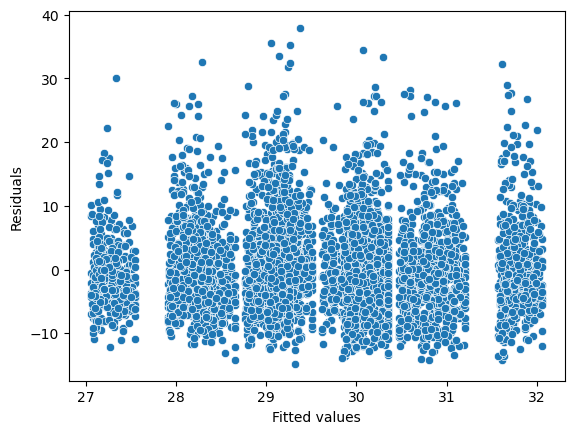

In [16]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

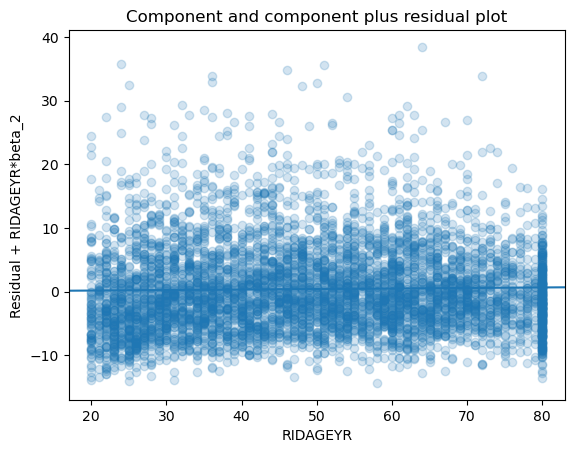

In [21]:
from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()
plot_ccpr(result, "RIDAGEYR", ax)
_ = ax.lines[0].set_alpha(0.2)

In [25]:
da1 = pd.read_csv(url)

In [ ]:
ALQ101

In [26]:
da1

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.datasets import load_boston
boston_dataset = load_boston() 

In [29]:
boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
boston["MEDV"] = boston_dataset.target

In [30]:
url = "nhanes_2015_2016.csv"
NHANES = pd.read_csv(url)
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
NHANES = NHANES[vars].dropna()
NHANES["smq"] = NHANES.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})
NHANES["RIAGENDRx"] = NHANES.RIAGENDR.replace({1: "Male", 2: "Female"})
NHANES["DMDEDUC2x"] = NHANES.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",5: "College", 7: np.nan, 9: np.nan})

In [31]:
np.random.seed(123)

In [32]:
model = sm.OLS.from_formula("MEDV ~ RM + CRIM", data=boston)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           5.22e-86
Time:                        16:31:45   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.2447      2.588    -11.300      0.000     -34.330     -24.160
RM             8.3911      0.405     20.726      0.000       7.596       9.186
CRIM          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model = sm.OLS.from_formula("MEDV ~ RM + CRIM + LSTAT", data=boston)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          1.01e-112
Time:                        16:32:55   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5623      3.166     -0.809      0.419      -8.783       3.658
RM             5.2170      0.442     11.802      0.000       4.348       6.085
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model = sm.GLM.from_formula("smq ~ RIAGENDRx + RIDAGEYR + DMDEDUC2x", family=sm.families.Binomial(), data=NHANES)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5093
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.2
Date:                Thu, 01 Jun 2023   Deviance:                       6402.4
Time:                        16:33:34   Pearson chi2:                 5.10e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09976
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.3060      0.114    -20.174      0.000      -2.530      -2.082
RIAGENDRx[T.Male]            0.9096      0.060     15.118      0.000       0.792       1.028
DMDEDUC2x[T.HS]              0.9434      0.090     10.521      0.000       0.768       1.119
DMDEDUC2x[T.SomeCollege]     0.8322      0.084      9.865      0.000       0.667       0.998
DMDEDUC2x[T.lt9]             0.2662      0.109      2.438      0.015       0.052       0.480
DMDEDUC2x[T.x9_11]           1.0986      0.107     10.296      0.000       0.889       1.308
RIDAGEYR                     0.0183      0.002     10.582      0.000       0.015       0.022
============================================================================================
"""